<a href="https://colab.research.google.com/github/moqri/Aging-Cell-Morphology/blob/master/plot_raw_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
image_file='AMC-24--001-macurato.tif'

In [26]:
from PIL import Image
import numpy as np
im = Image.open(image_file)
imarray = np.array(im)
imarray.shape   ############### THERE ARE THREE CHANNELS!

(1040, 1388, 3)

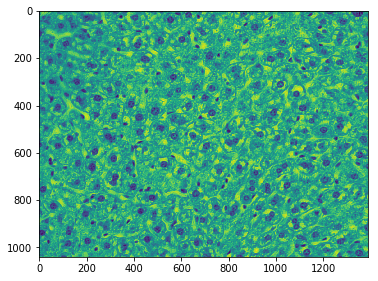

In [27]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20, 20))
f.add_subplot(1,3, 1)
ima=imarray[:,:,1]
plt.imshow(ima,vmin=7, vmax=54)

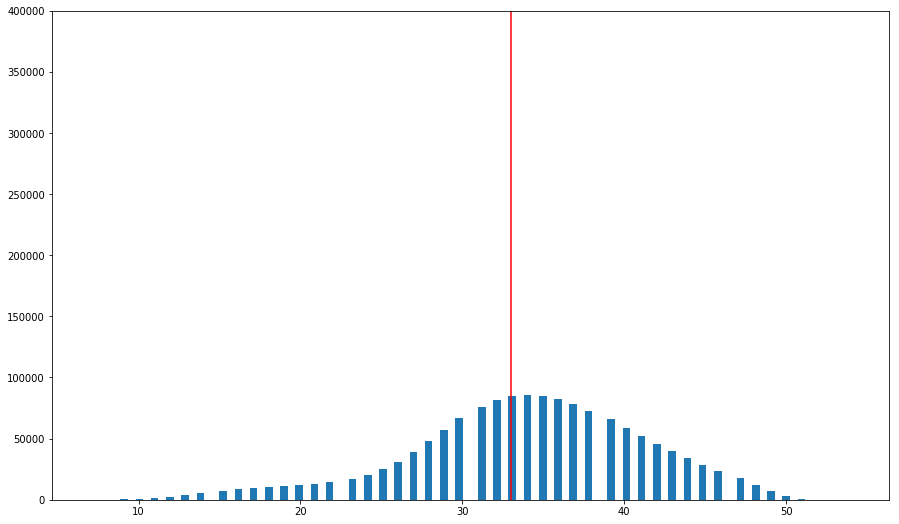

In [29]:
from skimage import filters 
def find_threshold(ima):
    threshold = filters.threshold_otsu(ima)
    return threshold

threshold=find_threshold(ima)
_=plt.hist(ima.reshape([-1]),100)
plt.ylim(0,400000)
plt.plot([threshold,threshold],[0,400000],'r')

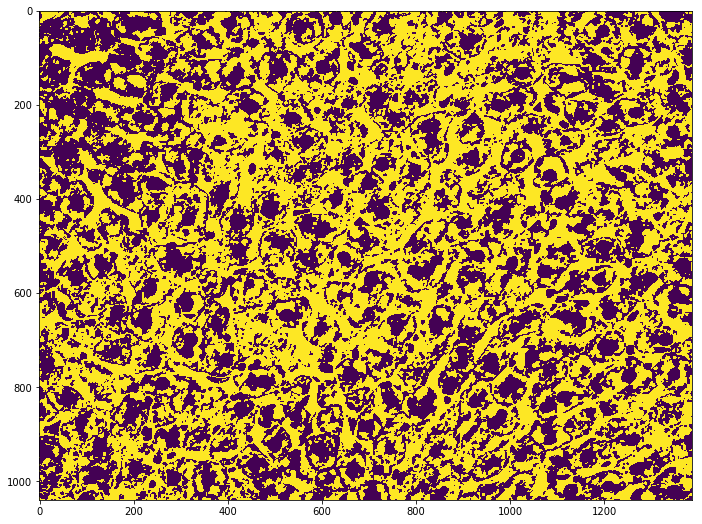

In [30]:
plt.rcParams['figure.figsize']=(15,9)
plt.imshow(ima>threshold)

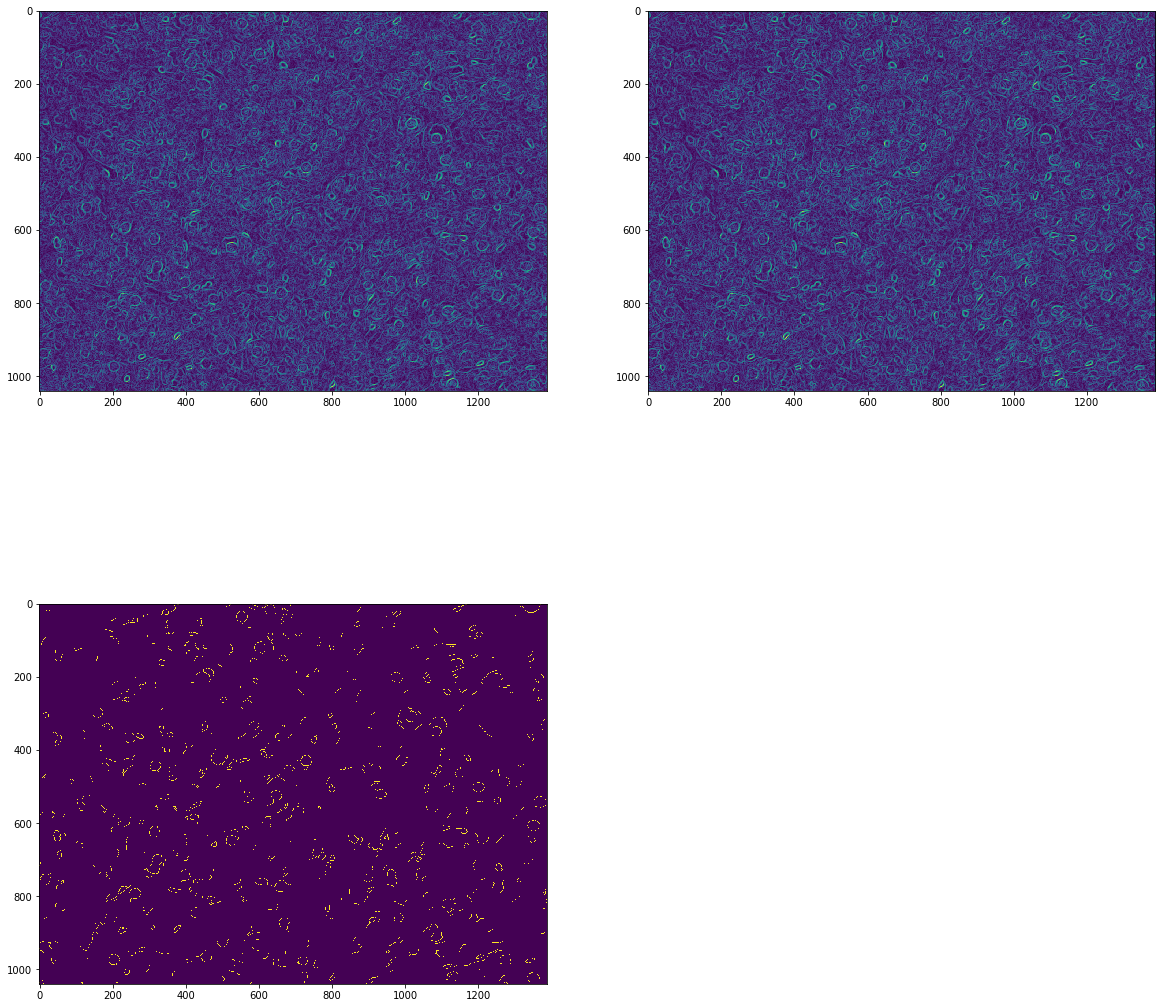

In [49]:
from skimage import filters
from skimage import feature
fsob=filters.sobel(ima)
fprew=filters.prewitt(ima)
fcanny=feature.canny(ima,sigma=.001)
fblob=feature.blob_log(ima)

f = plt.figure(figsize=(20, 20))
f.add_subplot(2,2, 1)
plt.imshow(fsob)
f.add_subplot(2,2, 2)
plt.imshow(fprew)
f.add_subplot(2,2, 3)
plt.imshow(fcanny)


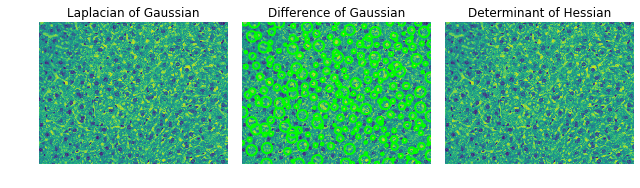

In [48]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
image = ima
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()